# Polynomial Regression / Feature Engineering

Author: Sahngyoon Rhee

We have explained in another notebook how linear regression works. In this notebook, we review the concept of linear regression, go over the concept of feature engineering, and apply a simple example model of feature engineering - polynomial regression - using `sklearn` package.

## Review of Linear Regression

We have learned that a linear regression amounts to finding the best values for the parameters $b, \theta_1, \theta_2, \dots, \theta_n$ that minimizes the Mean Square Error (MSE). Equivalently, we can also find the Maximum Likelihood Estimate of the parameters $b, \theta_1, \theta_2, \dots, \theta_n$ that maximizes the likelihood function under the assumption that the errors are normally distributed, plus a few more reasonable assumptions.

Specifically, The likelihood function for a linear regression model is given by:

$$L(b, \theta_1, \theta_2, \dots, \theta_n | X, y) = \displaystyle\prod_{i = 1}^n \frac{1}{\sqrt{2 \pi \sigma^2}}\exp \Big( - \frac{(y_i - (b + \theta_1x_{i1} + \theta_2 x_{i2} + \cdots + \theta_n x_{in}))^2}{2 \sigma^2}\Big)$$

where $y_i$ is the target value for the $i$th training data, $x_{ij}$ is the $j$th feature of the $i$th training data $x_i$, and $\sigma^2$ is the variance of the errors.

We also make the following assumptions - these may look technical but are rather natural when we think of them, so long as we assume a linear relationship between the feature variable and the feature variables, although not all of these assumptions necessarily hold in real life:

1. The relationsip between the dependent variable and the independent variables is linear.
2. The observations are indepnedent of each other.
3. The variance of the errors is constant across all levels of the independent variables.
4. The errors are normally distributed.

## Feature Engineering - the concept

Feature Engineering is an important concept in machine learning when we synthetically create new features based on existing ones.

A classic example of feature engineering is as follows: suppose that we are analyzing housing prices, and have two features, the house's width and length (for the sake of this example, we assume that all houses are rectangular). We want to make a model predicting housing prices. We can label the features as $x_1$ (for the house width) and $x_2$ (for the house length), and make a multilinear linear regression. Can we do better than this?

A key feature in housing price prediction is the size of the house. For that, we can let $x_3$ be our new feature that is defined by $x_3 := x_1 x_2$, calculate the new values for our new feature for each house, and run a new regression on $x_1, x_2$, and $x_3$, *pretending that $x_3$ is a independent variable*. Of course, $x_3$ was derived from $x_1$ and $x_2$ so it is not truly independent, but introducting the new variable allows for more flexibility in our regression. We can also do a similar thing for other variables - for example, if we are given three other features, $x_4$ of the average annual temprature, $x_5$ of average number of rainy days per year, and $x_6$ proximity to nature, and if we somehow come up with a reasonable metric for 'desireable weather condition`, then we can define $x_7$ to be a new variable that is a function of $x_4, x_5$, and $x_6$.

The process of synthetically making a new feature is called feature engineering.

### Polynomial Regression

Polynomial Regression is one of the common type of feature engineering. Suppose that we have a predictor variable $x$, a bunch of labeled data sets whose target variable $y$ is continuous, and we want to find the best fitting polynomial. How can we do this?

The first step is in determining what degree of polynomial we want to use. An initial thought may be to use a very high degree polynomial, say a $10$th degree polynomial. When we try to fit a 10th degree polynomial to a dataset of 8 points, for example, we can actually come up with a 10th degree polynomial that goes through all of the points - this particular type of polynomial is called Lagrange polynomial, and the theory of [Lagrange polynomial](https://en.wikipedia.org/wiki/Lagrange_polynomial) says that in general, we can fit a polynomial of degree at most $k$ if we have $k+1$ datapoints, and such a polynomial is unique.

However, the Lagrange polynomial is not suitable for many practical purposes, even as Lagrange polynomial does not require iteration. Not only can the formula for Langrage polynomial be computationally expensive as the number of training example goes up, but also more importantly it runs into overfitting. This means that the lagrange polynomial, even as it can go through all the training dataset perfectly, it fails to generalize the patterns, i.e. it's very poor at predicting the target value of new, unseen datapoint.

This is why we want to choose a suitable degree $k$ of the polynomial - normally, this is a matter of trial and error to see which $k$ works best for a given dataset we are working with. In other words, instead of trying to figure out which $k$ is the best, we just try a bunch of them, and see which one has the highest test prediction accuracy.

For any given degree $k$, we then form new variables $x_2 := x^2, x_3 := x^3, \dots, x_k := x^k$, and run a multilinear regression. This means, in effect, finding the parameters $b, \theta_0, \theta_1, \dots, \theta_k$ so that the Mean Squared Error (MSE) between the polynomial $y = \theta_k x^k + \theta_{k-1} x^{k-1} + \cdots + \theta_1 x_1 + b$ is minimized. In other words, this sort of feature engineering allows us to find a best-fit $k$th degree polynomial.

Of course, we can easily generalize this to a case when we have multiple features, say $x_1, x_2$, and $x_3$. We would then form new features such as $x_1^3, x_2^2, x_3^4$, *and* mixed variables such as $x_1x_2, x_2^3x_3$, and $x_1x_2x_3$.

Next, we impliment a polynomial regression using `sklearn` package in Python.

Root Mean Squared Error: 3.074
R^2 Score: 0.990


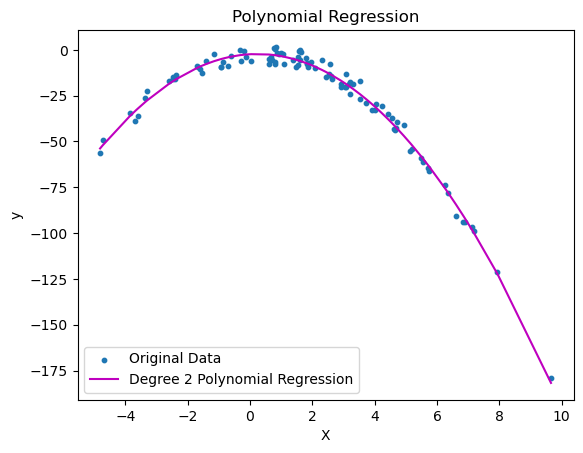

In [2]:
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import operator

# Generate some sample data, for the equation $y = x - 2x^2$
np.random.seed(0)
X = 2 - 3 * np.random.normal(0, 1, 100)
y = X - 2 * (X ** 2) + np.random.normal(-3, 3, 100)

# Reshape X to be a 2D array
# you can also do X[..., None]
X = X[:, np.newaxis]

# Transform the data to include polynomial features
degree_num = 2
polynomial_features = PolynomialFeatures(degree=degree_num)
X_poly = polynomial_features.fit_transform(X)

# Fit the polynomial regression model
model = LinearRegression()
model.fit(X_poly, y)

# Make predictions
y_pred = model.predict(X_poly)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = model.score(X_poly, y)
print(f"Root Mean Squared Error: {rmse:.3f}")
print(f"R^2 Score: {r2:.3f}")

# Visualize the results
plt.scatter(X, y, s=10, label = 'Original Data')
# Sort the values of X before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X, y_pred), key=sort_axis)
X, y_pred = zip(*sorted_zip)
plt.plot(X, y_pred, color='m', label = f'Degree {degree_num} Polynomial Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Polynomial Regression')
plt.legend()
plt.show()

A case when a polynomial regression would be useful is when we suspect a curved trend in a dataset. However, a piolynomial regression has some drawbacks, such as the following:

- Overfitting: Polynomial regression can easily overfit the data, especially if the degree of the polynomial is high. This means it might perform well on the training data but poorly on unseen data.- 
Multicollinearity: Higher-degree polynomials can introduce multicollinearity, where predictor variables become highly correlated, leading to unstable estimates of regression coefficients.- 
Computational Complexity: As the degree of the polynomial increases, the model becomes more complex and computationally expensive to train- .
Interpretability: Higher-degree polynomials can make the model harder to interpret, as the relationship between the predictors and the response variable becomes more compl

In order to overcome the drawbacks of a polynomial regression, we can consider other models and/or methods, such as:

- Ridge or Lasso regression: make the error (loss) function not as the mean squared error, but as the MSE plus a term $\frac{\lambda}{2}||\vec{\theta}||^p$, where $p = 1$ for Lasso regularization and $p = 2$ for Ridge regularization. In effect, this prevents all of the weights $\theta_1,\dots,\theta_n$ from becoming too large, reducing the effect of overfitting.
- Decision Trees / Random Forest: A decision tree is an effective model for classification tasks,and we can modify a decision tree so that it is suitable for a regression task. A random forest is putting together a bunch of independent decision trees for a better prediction.
- Support Vector Machines (SVM): Support Vector Machines, like decision trees, is a model for classification tasks, and it can be modified to be used for regression.
- Neural Network: These are, in essence, stitching together various functions, such as logistic regression, so that the end ersulting model can generalize much more than logistic regression or linear regression.ex.